In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from glob import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt

In [ ]:
data_file =glob("/content/drive/MyDrive/Colab Notebooks/Digital image project/Cars/*.jpg")

In [ ]:
print(len(data_file))

789


In [ ]:
img_mpl= plt.imread(data_file[1])
img_cv2= cv2.imread(data_file[1])
img_mpl.shape , img_cv2.shape

((165, 299, 3), (165, 299, 3))

In [ ]:
img_mpl.max()


np.uint8(255)

In [ ]:
img_mpl/255

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

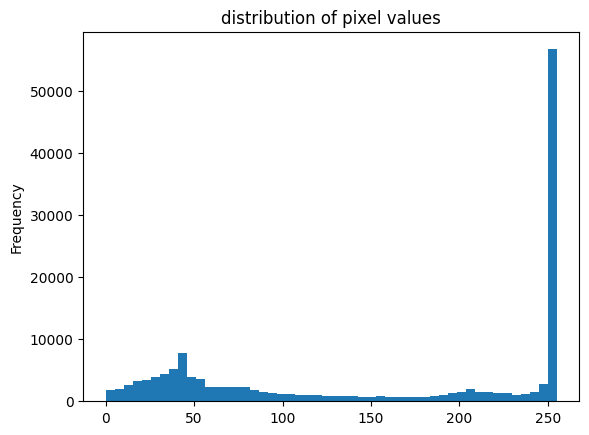

In [ ]:
pd.Series(img_mpl.flatten()).plot(kind='hist',
                                 bins=50,
                                 title= 'distribution of pixel values')
plt.show()

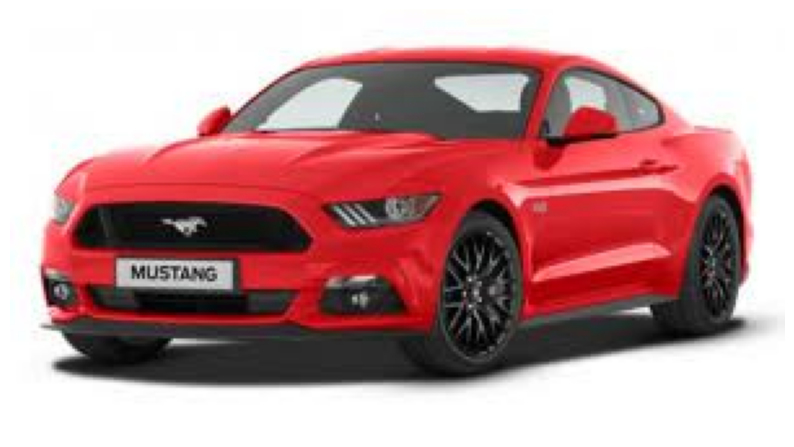

In [ ]:
fig , ax = plt.subplots(figsize=(10,10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

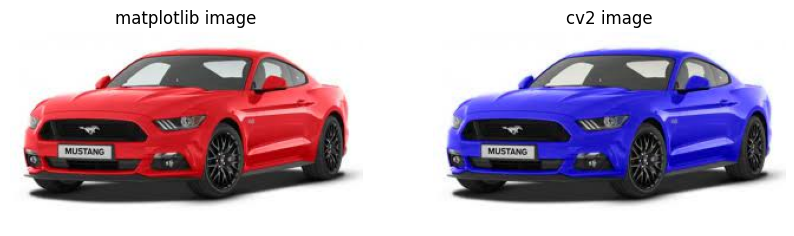

In [ ]:
ig , ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_mpl)
ax[1].imshow(img_cv2)
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('matplotlib image')
ax[1].set_title('cv2 image')
plt.show()

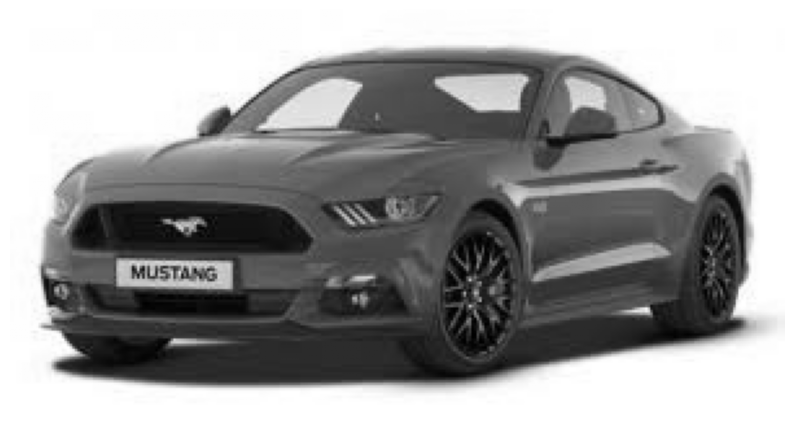

In [ ]:
img_cv2_rgb= cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)

fig , ax = plt.subplots(figsize=(10,10))
ax.imshow(img_cv2_rgb, cmap='gray')
ax.axis('off')
plt.show()

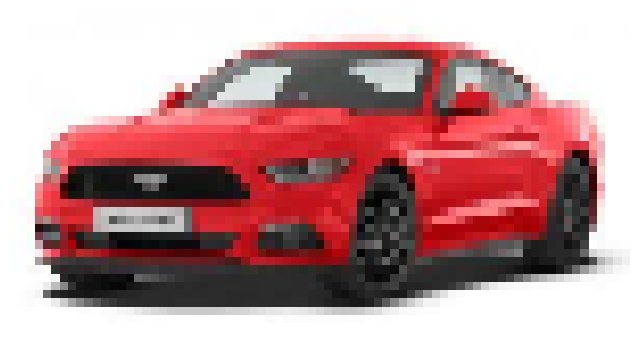

In [ ]:
img_resized= cv2.resize(img_mpl, None, fx=0.25 , fy=0.25)
fig , ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

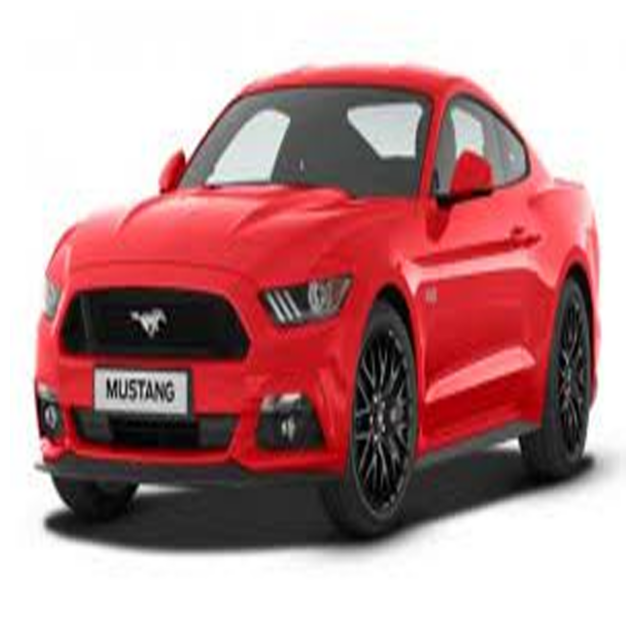

In [ ]:
img_resize3= cv2.resize(img_mpl, (6000,6000), interpolation=cv2.INTER_CUBIC)
fig , ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resize3)
ax.axis('off')
plt.show()

299 168 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


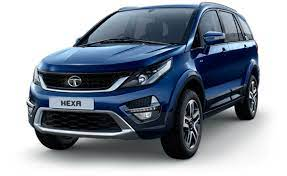

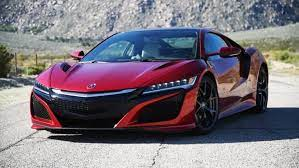

In [ ]:
from PIL import Image
from IPython.display import display

c1=Image.open('/content/drive/MyDrive/Colab Notebooks/Digital image project/Cars/Car (110).jpg')
c2=Image.open('/content/drive/MyDrive/Colab Notebooks/Digital image project/Cars/Car (55).jpg')
#c2.shape occurres an error
print(c2.width, c2.height, c2.mode, c2.format, type(c2))
display(c1)
display(c2)

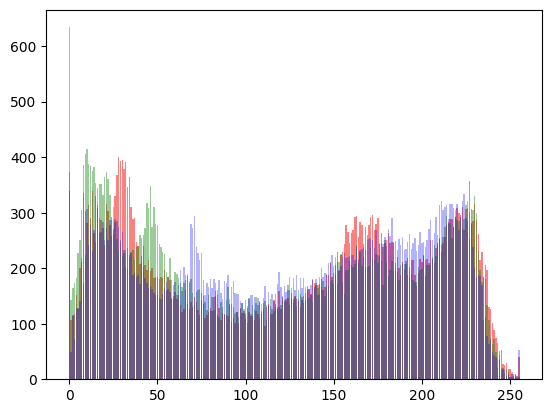

In [ ]:
 pl = c2.histogram()
 plt.bar(range(256), pl[:256], color='r', alpha=0.5)
 plt.bar(range(256), pl[256:512], color='g', alpha=0.4)
 plt.bar(range(256), pl[512:], color='b', alpha=0.3)
 plt.show()

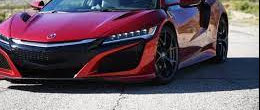

In [ ]:
c2_cropped= c2.crop((40,50,300,160))
display(c2_cropped)

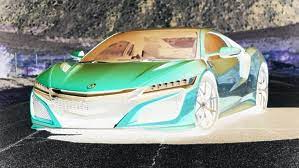

In [ ]:
c2N= c2.point(lambda x: 255-x)
display(c2N)

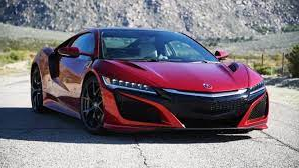

In [ ]:
c2_flipped= c2.transpose(Image.FLIP_LEFT_RIGHT)
display(c2_flipped)

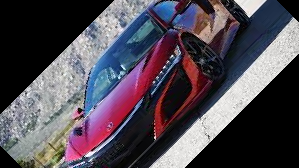

In [ ]:
c2_rotate2= c2.rotate(45)
display(c2_rotate2)

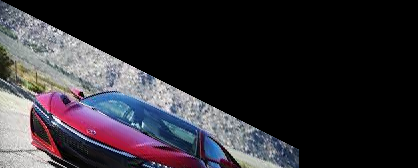

In [ ]:
c2_shear= c2.transform((int(1.4*c2.width), c2.height), Image.AFFINE,data=(1,0,0,-0.5,1,0))
display(c2_shear)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Digital image project/Cars/Car (55).jpg')
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Digital image project/Cars/Car (55).jpg')
img.shape

(168, 299, 3)

In [ ]:
image2_resized= cv2.resize(img2, (750,600))
image2_resized.shape

(600, 750, 3)

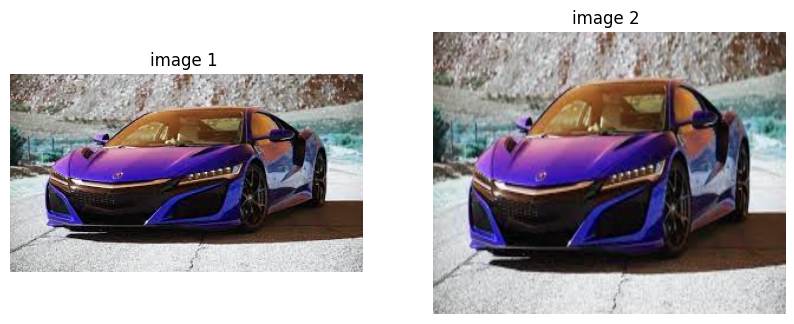

In [ ]:
fig , ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img)
ax[1].imshow(image2_resized)
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('image 1 ')
ax[1].set_title('image 2 ')
plt.show()

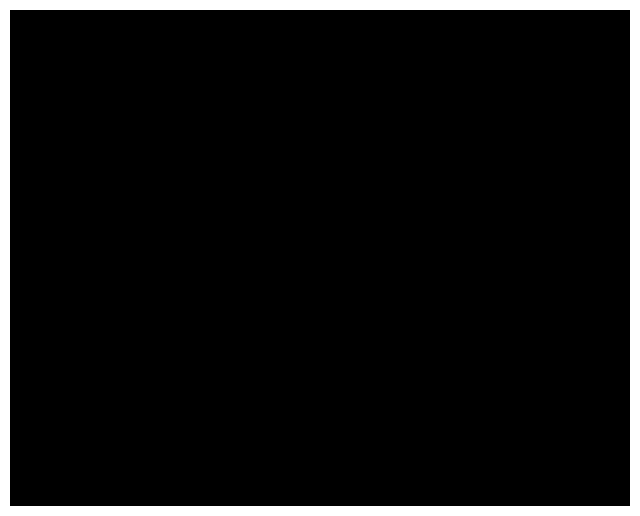

In [ ]:
# Resize image1 to match the dimensions of image2_resized before subtraction
image1_resized = cv2.resize(img, (image2_resized.shape[1], image2_resized.shape[0]))

# Perform subtraction on the resized images
sub = cv2.subtract(image1_resized, image2_resized)

# Display the result
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sub)
ax.axis('off')
plt.show()